# Softmax - MNIST

En este notebook vamos a ver la implementación de Softmax en NumPy para clasificación multiclase. Vamos a aplicar el modelo al dataset de dígitos escritos a mano de la clase 2. 

## Cargamos las Librerías

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix
import itertools
import random
import time

RANDOM_STATE = 17

## Cargamos el Dataset

In [3]:
# Cargamos los datos
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [4]:
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de las etiquetas: (1797,)


In [5]:
clases = np.unique(y)
print(clases)

[0 1 2 3 4 5 6 7 8 9]


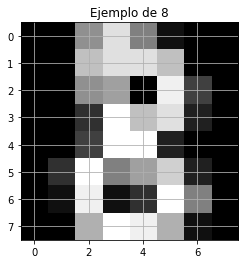

In [6]:
# Cargamos una muestra

plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')
plt.show()

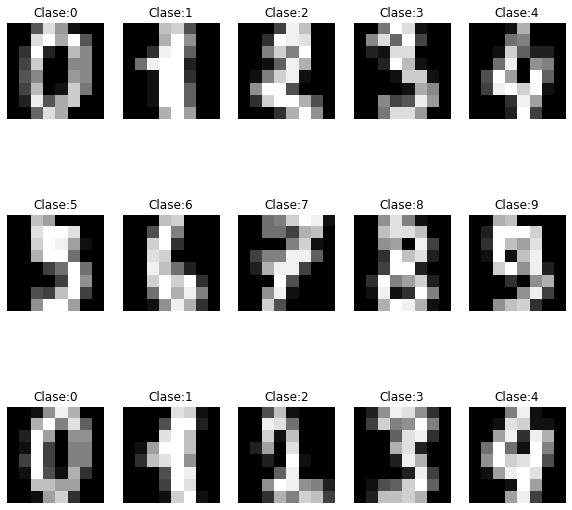

In [7]:
# Graficamos varias muestras

fig = plt.figure(figsize=(10, 10))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X[i].reshape(8, 8), cmap=plt.get_cmap('gray'))
    ax.set_title('Clase:{y}'.format(y=y[i]))
    plt.axis('off')
plt.show()

In [8]:
# Split del dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [9]:
X_train.shape

(1437, 64)

In [10]:
y_train.shape

(1437,)

## Plateamos histograma de datos y entrenamos el Modelo

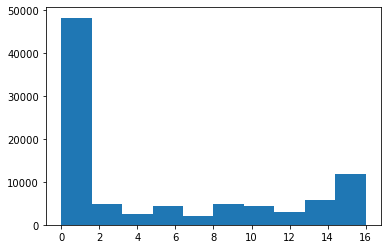

In [11]:
f, ax = plt.subplots()

ax.hist(X_train.flatten())

plt.show()

In [12]:
np.max(X_train)

16.0

In [13]:
# Escalamos las features

X_train_s = X_train / 16
X_test_s = X_test / 16

In [14]:
# Seleccionar hiperparámetros

lr = 0.01 # Learning rate
batchSize = 10 # Tamaño de los minibatch
epochs = 1000 # Epochs de entrenamiento
alpha = 0.001 # Peso de la regularización

In [26]:
softmax_clf = SGDClassifier(loss='log', 
                                   penalty='l2', 
                                   #penalty='l1', 
                                   alpha=alpha, 
                                   fit_intercept=True, 
                                   learning_rate='constant',
                                   #learning_rate='optimal',
                                   eta0=lr,
                                   max_iter=epochs, 
                                   shuffle=True, 
                                   verbose=0#1
                                   )
incio_ejecucion = time.time()
## Ejecutando como minibach
for i in range(epochs):
    for i in range(0, len(X_train_s), batchSize):
        end = i + batchSize if i + batchSize <= len(X_train_s) else len(X_train_s)        
        X =  X_train_s[i: end]
        y = y_train[i: end]
        softmax_clf.partial_fit(X, y, classes = clases)

## Ejecutando como stochastic (m=1)        
#softmax_clf.fit(X_train_s, y_train)

fin_ejecucion = time.time()
tiempo_total = round(fin_ejecucion-incio_ejecucion,2)
print("El tiempo de ejecucion del fiteo de mi modelo fue: ",tiempo_total)

El tiempo de ejecucion del fiteo de mi modelo fue:  820.38


In [27]:
#Cantidad de iteraciones totales (num iteraciones * num muestras)
softmax_clf.t_

1437001.0

### Predicciones y Matriz de Confusión

In [17]:
def plotConfusionMatrix(conf_mtx, c):
    plt.figure(figsize=(15,15))
    plt.imshow(conf_mtx, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()

    tick_marks = np.arange(c)
    plt.xticks(tick_marks, np.arange(c) , rotation=45)
    plt.yticks(tick_marks, np.arange(c))

    fmt = '.2f'
    thresh = conf_mtx.max() / 2.

    for i, j in itertools.product(range(conf_mtx.shape[0]), range(conf_mtx.shape[1])):
        plt.text(j, i, format(conf_mtx[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_mtx[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [18]:
predictions = softmax_clf.predict(X_test_s)

In [19]:
accuracy = accuracy_score(y_test, predictions)# normalize=True
print("Accuracy: ",accuracy)

Accuracy:  0.9305555555555556


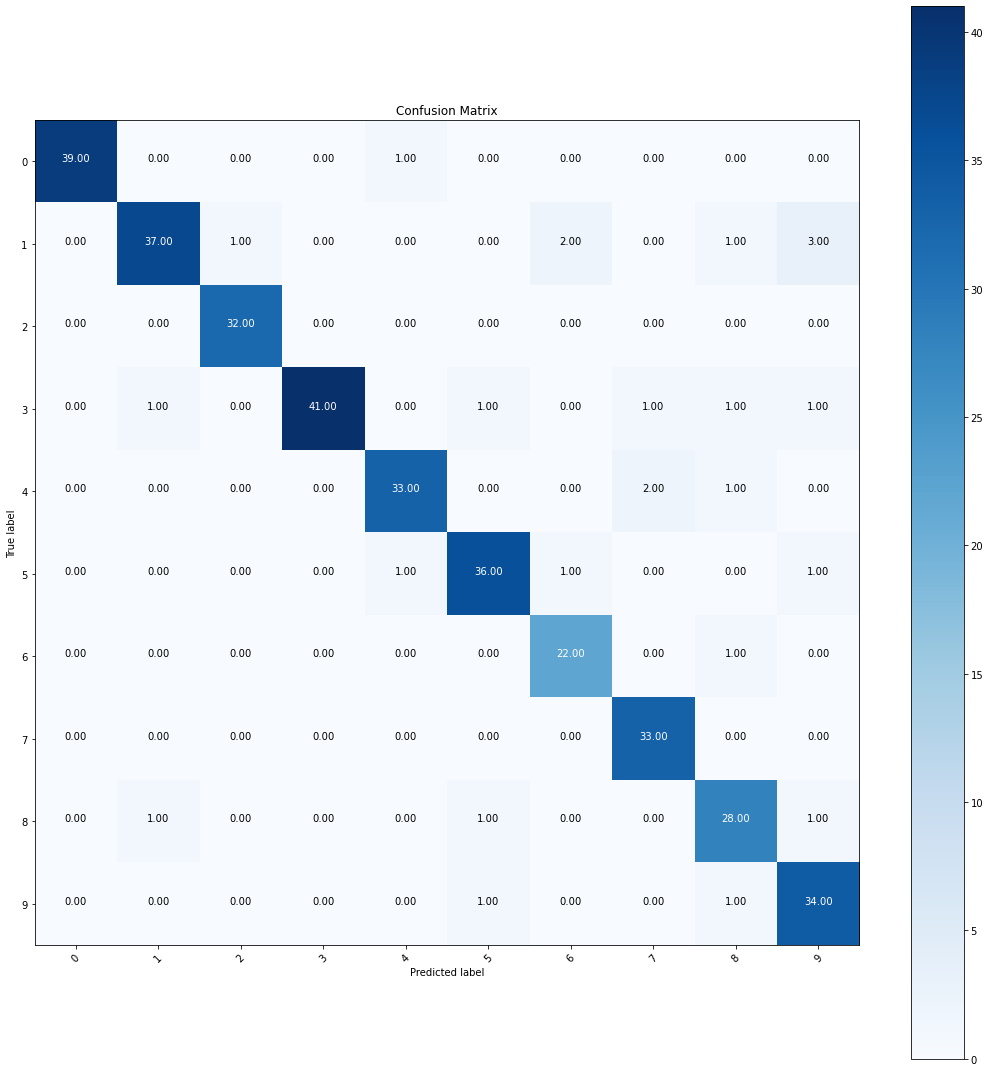

In [20]:
conf_mtx =confusion_matrix(y_test, predictions)
plotConfusionMatrix(conf_mtx, 10)

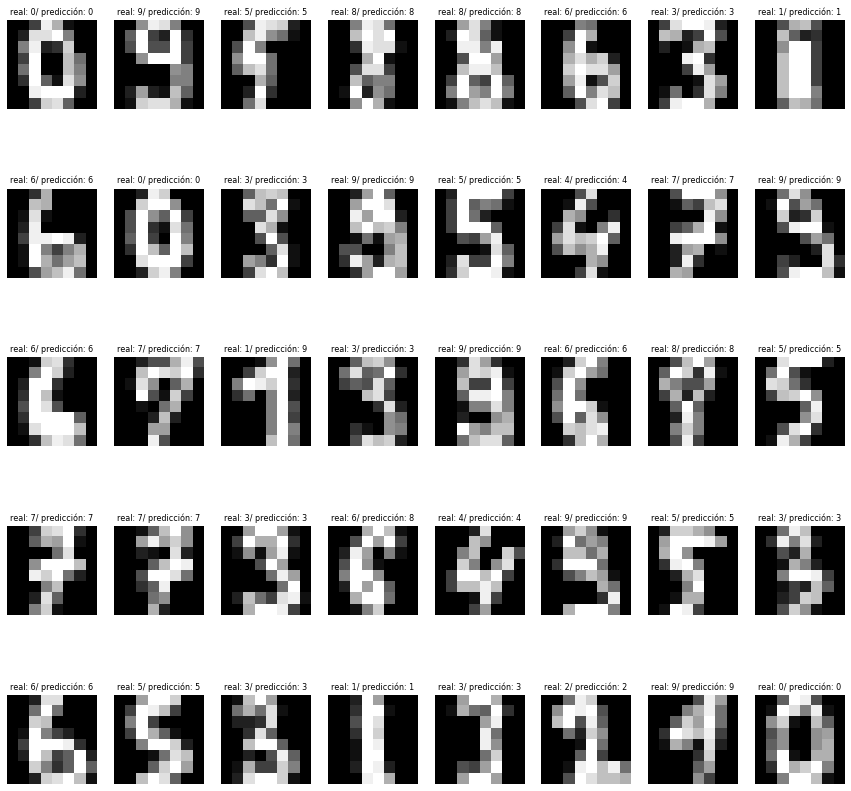

In [21]:
fig = plt.figure(figsize=(15,15))

for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.get_cmap('gray'))    
    ax.set_title('real: {y}/ predicción: {y_hat}'.format(y=y_test[i], y_hat=predictions[i]), fontsize=8)
    plt.axis('off')

### Conclusiones de las ejecuciones

Accuracy utilizando minibach:  0.9583333333333334
Accuracy sin minibach:         0.9472222222222222

Se obtuvo mejor accuracy con minibach, pero el tiempo de procesamiento del modelo (fit) fue de varias ordenes de magnitud superior con el mismo. Por lo tanto se podria utilizar stochastic y obtener un buen resultado con un buen tiempo de ejecucion


Tiempo de ejecucion con stochastic: 0.12 segundos con 45985 iteraciones

Tiempo de ejecucion con mini-batch: 820.38 segundos con 1437001 iteraciones


Con penalty l2 tambien se obtuvieron mejores resultados que con penalty l1